In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
from category_encoders import *
import matplotlib.pyplot as plt

In [2]:
# read csv file and get it as dataframe
df = pd.read_csv('w9car_prices.csv', error_bad_lines = False)
df.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# getting  types of columns
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [4]:
# looking for number of rows and columns, which will be important for next steps
df.shape

(558811, 16)

In [5]:
# names of columns
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [6]:
# collecting categoric columns together into list
df.columns[df.columns.dtype == 'object']   

array([['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
        'state', 'condition', 'odometer', 'color', 'interior', 'seller',
        'mmr', 'sellingprice', 'saledate']], dtype=object)

In [7]:
df.nunique()

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [8]:
# obtaining number of nulls in percentage for each column
df.isnull().sum()*100 / len(df)

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [9]:
df['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [10]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [11]:
# We notice unwanted element '-' in 'interior' and 'color' columns, for this reason eliminate them beforehand
df.loc[df.interior == '—', 'interior'] = np.nan
df.loc[df.color == '—', 'color'] = np.nan

As we observed above only one column ('transmission') has more nulls, others can be ignored,because number of data points is high, so we can drop other nans. Below, we will fill null values in 'transmision' column using modelling.Also, modelling is suitable for filling here because of number of data points.

In [12]:
# Drop null values from all columns except column 'transmission'
df= df.dropna(subset=df.columns.difference(['transmission']))

In [13]:
df.isnull().sum()*100 / len(df)

year             0.000000
make             0.000000
model            0.000000
trim             0.000000
body             0.000000
transmission    11.541328
vin              0.000000
state            0.000000
condition        0.000000
odometer         0.000000
color            0.000000
interior         0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

Encoding categorics

Now we have nulls in only one column, and we will fill it with building model, but for this reason, we must convert categoric values into numeric ones, as a result, we made an investigation and did feature engineering.Below, you can observe these in action.

In [14]:
# looking for distinct number of values in each categoric column
df.nunique()

year                26
make                53
model              768
trim              1518
body                85
transmission         2
vin             490518
state               38
condition           41
odometer        163763
color               19
interior            16
seller           12450
mmr               1099
sellingprice      1820
saledate          3645
dtype: int64

Converting 'make' column's values based on countries which are the prominent producers of a car and more companies belong to them

In [15]:
df['make'] = df['make'].str.upper()

In [16]:
# unique values of column
df['make'].unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'HYUNDAI', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI',
       'LAND ROVER', 'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA',
       'SUBARU', 'SCION', 'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER',
       'FERRARI', 'HONDA', 'GMC', 'RAM', 'SMART', 'BENTLEY', 'PONTIAC',
       'SATURN', 'MASERATI', 'MERCURY', 'HUMMER', 'SAAB', 'SUZUKI',
       'OLDSMOBILE', 'ROLLS-ROYCE', 'ISUZU', 'GEO', 'TESLA',
       'ASTON MARTIN', 'PLYMOUTH', 'FISKER', 'DAEWOO', 'LAMBORGHINI',
       'LOTUS'], dtype=object)

In [17]:
enc = QuantileEncoder(cols=["make"], quantile=0.5, m=1.0).fit(df['make'],df['sellingprice'])

In [18]:
enc

QuantileEncoder(cols=['make'])

In [19]:
df['make'] = enc.transform(df['make'])

Transforming 'model' column's values based on countries 

In [20]:
df['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Q5',
       '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'SQ5', 'S5',
       'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900', 'Malibu',
       'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1', 'Enclave',
       'TTS', '4 Series', 'Silverado 2500HD', 'MDX', 'Silverado 1500',
       'SRX', 'X5', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe', 'Genesis',
       'Equus', 'Sonata', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'Mazda2', 'Rio', 'C-Class',
       '370Z', 'Soul', 'Outlander Sport', 'ES 350', 'E-Class', 'Mazda3',
       'Cooper Clubman', 'CX-9', 'Forte', 'Compass', 'JX', 'LR4',
       'Mazda5', 'M', 'Cooper', 'Range Rover Evoque', 'LS 460',
       'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'XF', 'GL-Class',
       'M-Class', 

In [21]:
enc = QuantileEncoder(cols=["model"], quantile=0.5, m=1.0).fit(df['model'],df['sellingprice'])

In [22]:
df['model'] = enc.transform(df['model'])

Now,we will convert 'body' column nearly the same way,but different approach,in which we will use types of bodies in cars in order to group them. 

In [23]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'King Cab', 'SuperCrew',
       'CTS Coupe', 'Extended Cab', 'E-Series Van', 'SuperCab',
       'Regular Cab', 'G Convertible', 'Koup', 'Quad Cab', 'CrewMax Cab',
       'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Access Cab',
       'Club Cab', 'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe',
       'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'Beetle Convertible',
       'GranTurismo Convertible', 'CTS-V Wagon', 'convertible', 'minivan',
       'suv', 'van', 'regular-cab', 'Transit Van', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'crew cab',
       'wagon', 'coupe', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax cab', 'genes

In [24]:
df['body'] = df['body'].apply(lambda x: x.upper())

In [25]:
df['body'].unique()

array(['SUV', 'SEDAN', 'CONVERTIBLE', 'COUPE', 'WAGON', 'HATCHBACK',
       'CREW CAB', 'G COUPE', 'G SEDAN', 'ELANTRA COUPE', 'GENESIS COUPE',
       'MINIVAN', 'VAN', 'DOUBLE CAB', 'KING CAB', 'SUPERCREW',
       'CTS COUPE', 'EXTENDED CAB', 'E-SERIES VAN', 'SUPERCAB',
       'REGULAR CAB', 'G CONVERTIBLE', 'KOUP', 'QUAD CAB', 'CREWMAX CAB',
       'CTS-V COUPE', 'G37 CONVERTIBLE', 'ACCESS CAB', 'CLUB CAB',
       'XTRACAB', 'Q60 CONVERTIBLE', 'CTS WAGON', 'G37 COUPE', 'MEGA CAB',
       'CAB PLUS 4', 'Q60 COUPE', 'TSX SPORT WAGON',
       'PROMASTER CARGO VAN', 'CAB PLUS', 'BEETLE CONVERTIBLE',
       'GRANTURISMO CONVERTIBLE', 'CTS-V WAGON', 'REGULAR-CAB',
       'TRANSIT VAN'], dtype=object)

In [26]:
# there are 7 main groups under 'body' column
suv = ['SUV']
sedan = ['SEDAN', 'G SEDAN']
convertible = ['CONVERTIBLE', 'G CONVERTIBLE', 'BEETLE CONVERTIBLE', 'Q60 CONVERTIBLE', 'GRANTURISMO CONVERTIBLE', 'G37 CONVERTIBLE']
coupe = ['COUPE', 'G COUPE', 'CTS COUPE', 'G37 COUPE', 'Q60 COUPE', 'CTS-V COUPE', 'ELANTRA COUPE', 'GENESIS COUPE']
wagon = ['WAGON','PROMASTER CARGO VAN', 'TSX SPORT WAGON', 'CTS WAGON', 'TSX SPORT WAGON', 'CTS-V WAGON']
hatchback = ['HATCHBACK', 'KOUP']
crew_cab = ['CREW CAB','ACCESS CAB',  'XTRACAB', 'CREWMAX CAB', 'DOUBLE CAB', 'EXTENDED CAB', 'MEGA CAB', 'QUAD CAB', 'SUPERCREW', 'CAB PLUS', 'CAB PLUS 4', 'CLUB CAB', 'KING CAB','REGULAR-CAB', 'SUPERCAB']
van = ['VAN','MINIVAN', 'E-SERIES VAN','TRANSIT VAN']

In [27]:
bodylist = {'suv':suv,
            'sedan':sedan,
            'convertible':convertible,
            'coupe' :  coupe,
            'wagon': wagon,
            'hatchback':hatchback,
            'crew_cab': crew_cab,
            'van': van}

In [28]:
for key, value in bodylist.items():
    conditions = df['body'].isin(value)
    df.loc[conditions,'encoded_body']= key

In [29]:
df['encoded_body'].value_counts()

sedan          227073
suv            131555
crew_cab        39057
van             29681
hatchback       23460
coupe           18020
wagon           14814
convertible      9720
Name: encoded_body, dtype: int64

In [30]:
del df['body']

In [31]:
bod = pd.get_dummies(df['encoded_body'],drop_first = True)

In [32]:
bod.corr()

,coupe,crew_cab,hatchback,sedan,suv,van,wagon
coupe,1.000000,-0.056541,-0.043094,-0.177457,-0.116134,-0.048793,-0.033937
crew_cab,-0.056541,1.000000,-0.064882,-0.267178,-0.174850,-0.073463,-0.051095
hatchback,-0.043094,-0.064882,1.000000,-0.203637,-0.133266,-0.055992,-0.038943
sedan,-0.177457,-0.267178,-0.203637,1.000000,-0.548778,-0.230568,-0.160364
suv,-0.116134,-0.174850,-0.133266,-0.548778,1.000000,-0.150891,-0.104947
van,-0.048793,-0.073463,-0.055992,-0.230568,-0.150891,1.000000,-0.044093
wagon,-0.033937,-0.051095,-0.038943,-0.160364,-0.104947,-0.044093,1.000000


In [33]:
df = pd.concat((df,bod),axis = 1)

In [34]:
df.shape

(497863, 23)

In [35]:
df.corr()['sellingprice'][bod.columns]

coupe        0.055272
crew_cab     0.152717
hatchback   -0.087287
sedan       -0.174582
suv          0.152422
van         -0.031234
wagon       -0.064856
Name: sellingprice, dtype: float64

'trim' means a specific model or variation of a car, and we will group them according to the mean of target variable,'sellingprice'

In [36]:
df['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [37]:
df['trim'] = df['trim'].apply(lambda x: x.upper())

In [38]:
df['trim'].nunique()

1499

19 elements were excluded,because they were same with some other elements.Let's look at ways how can we group trims of cars.

In [39]:
import category_encoders as ce

# Create a target encoder object
te = ce.TargetEncoder(cols=['trim'])

# Fit the encoder to the data and transform the "trim" variable
df = te.fit_transform(df, df['sellingprice'])

Working on 'color' column

Adding Color Codes in Decimals as Features

In [40]:
colors = {'Gray' : (128, 128, 128),
'Green' : (0, 255, 0),
'Blue' : (0, 0, 255),
'Black' : (0, 0, 0),
'White' : (255, 255, 255),
'Red' : (255, 0, 0),
'Lime' : (0, 255, 0),
'Yellow' : (255, 255, 0),
'Purple' : (128, 0, 128),
'Silver' : (192, 192, 192),
'Turquoise' : (48, 213, 200),
'Brown' : (150, 75, 0),
'Beige' : (245, 245, 220),
'Gold' : (255, 215, 0),
'Burgundy' : (128, 0, 32),
'Charcoal' : (54, 69, 79),
'Orange' : (255, 165, 0),
'Off_white' : (250, 249, 246),
'Pink' : (255, 192, 203)}

In [41]:
colors = {key.lower():value for key, value in colors.items()}

In [42]:
decimal_code = np.zeros((df.shape[0], 3))
for color_name, color_code in colors.items():
    decimal_code[df['color'] == color_name] = color_code

In [43]:
new_data = np.concatenate((decimal_code, df[['sellingprice']].values), axis = 1)
newdf = pd.DataFrame(new_data, columns = ['color_code1', 'color_code2', 'color_code3', 'price'])

In [44]:
newdf.corr()['price']

color_code1   -0.027800
color_code2   -0.033024
color_code3   -0.034455
price          1.000000
Name: price, dtype: float64

In [45]:
#Summary: Not Useful. Correlation with Selling Price is -0.03

Grouping Colors into two categories in terms of Selling Price means 

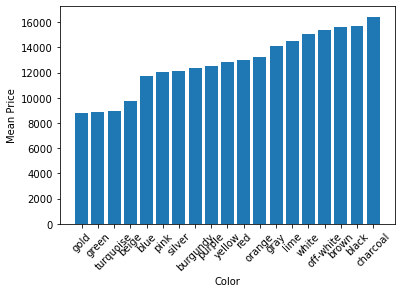

In [46]:
means = df.groupby('color')['sellingprice'].mean()
means = means.sort_values()
cols = means.index
values = means.values

plt.xticks(rotation = 45)
plt.ylabel('Mean Price')
plt.xlabel('Color')
plt.bar(cols, values)
plt.savefig('color_mean_price.png')

In [47]:
threshold = (means['blue'] + means['beige']) / 2

In [48]:
unpopular_colors = means[means < threshold].index
popular_colors = means[means >= threshold].index

In [49]:
popular_colors

Index(['blue', 'pink', 'silver', 'burgundy', 'purple', 'yellow', 'red',
       'orange', 'gray', 'lime', 'white', 'off-white', 'brown', 'black',
       'charcoal'],
      dtype='object', name='color')

In [50]:
df['eval_color'] = df['color']
df.loc[df['eval_color'].isin(unpopular_colors), 'eval_color'] = 'unpopular'
df.loc[df['eval_color'].isin(popular_colors), 'eval_color'] = 'popular'

In [51]:
eval_color = pd.get_dummies(df['eval_color'], drop_first = True)
pd.concat((eval_color, df[['sellingprice']]), axis = 1).corr()['sellingprice']

unpopular      -0.119405
sellingprice    1.000000
Name: sellingprice, dtype: float64

In [52]:
eval_color.shape, df.sellingprice.shape

((497863, 1), (497863,))

In [53]:
eval_color = eval_color.astype(np.int64)

In [54]:
df['eval_color'] = eval_color

In [55]:
#Summary: Low but Better. Correlation with Selling Price is -0.12

Applying TargetEncoder Method

In [56]:
te = TargetEncoder(cols = 'color')
encoded_color = te.fit_transform(df.color, df.sellingprice)

In [57]:
encoded_color.rename({'color': 'encoded_color'}, axis = 1, inplace = True)

In [58]:
df['encoded_color'] = encoded_color

In [59]:
df.corr()['encoded_color']['sellingprice']

0.19261673798062948

In [60]:
#Summary: Low but Better. Correlation with Selling Price is 0.19

'interior' column

In [61]:
te = TargetEncoder(cols = ['interior']).fit(df['interior'], df['sellingprice'])
df['encoded_interior'] = te.transform(df['interior'])

In [62]:
df.corr()['sellingprice']['encoded_interior']

0.24072179183640424

In [63]:
#Summary: Low but Better. Correlation with Selling Price is 0.24

'seller' column

In [64]:
df.reset_index(drop = True, inplace = True)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
vectorizer = TfidfVectorizer(max_features = 5)
tfidf = vectorizer.fit_transform(df.seller)

In [67]:
cols = vectorizer.get_feature_names_out()

In [68]:
tfidf = pd.DataFrame(tfidf.toarray(), columns = cols)

In [69]:
tfidf.shape

(497863, 5)

In [70]:
pd.concat((tfidf, df[['sellingprice']]), axis = 1).corr()['sellingprice']

auto           -0.025927
corporation    -0.005295
credit         -0.011887
inc             0.068787
services        0.082616
sellingprice    1.000000
Name: sellingprice, dtype: float64

In [71]:
df = pd.concat((df, tfidf), axis = 1)

In [72]:
df.shape

(497863, 31)

'saledate' column

In [73]:
saledate = df['saledate'].str.split(expand = True)

In [74]:
df['saledate']

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
497858    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
497859    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
497860    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
497861    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
497862    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 497863, dtype: object

In [75]:
saledate = saledate.rename({0:'day', 1:'month', 2:'day_number', 3:'year', 4:'time', 5:'gmt', 6:'standard_time'}, axis = 1)

In [76]:
saledate

,day,month,day_number,year,time,gmt,standard_time
0,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)
1,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)
2,Thu,Jan,15,2015,04:30:00,GMT-0800,(PST)
3,Thu,Jan,29,2015,04:30:00,GMT-0800,(PST)
4,Thu,Dec,18,2014,12:30:00,GMT-0800,(PST)
...,...,...,...,...,...,...,...
497858,Thu,Jul,09,2015,07:00:00,GMT-0700,(PDT)
497859,Wed,Jul,08,2015,09:30:00,GMT-0700,(PDT)
497860,Wed,Jul,08,2015,09:30:00,GMT-0700,(PDT)
497861,Thu,Jul,09,2015,06:45:00,GMT-0700,(PDT)


Next few code lines check for appropriateness of columns

In [77]:
saledate.day.unique()

array(['Tue', 'Thu', 'Wed', 'Fri', 'Mon', 'Sat', 'Sun'], dtype=object)

In [78]:
saledate.month.unique()

array(['Dec', 'Jan', 'Jul', 'Feb', 'May', 'Jun', 'Mar', 'Apr'],
      dtype=object)

In [79]:
saledate.day_number.unique()

array(['16', '15', '29', '18', '30', '17', '20', '13', '23', '07', '03',
       '06', '26', '12', '04', '22', '14', '27', '31', '21', '08', '11',
       '28', '10', '05', '19', '25', '09', '24', '02', '01'], dtype=object)

In [80]:
saledate.year.unique()

array(['2014', '2015'], dtype=object)

In [81]:
saledate.groupby('month').day_number.max()

month
Apr    30
Dec    31
Feb    27
Jan    30
Jul    21
Jun    30
Mar    31
May    31
Name: day_number, dtype: object

In [82]:
saledate.groupby(['year', 'month']).day_number.max()

year  month
2014  Dec      31
      Feb      14
      Jan      15
2015  Apr      30
      Feb      27
      Jan      30
      Jul      21
      Jun      30
      Mar      31
      May      31
Name: day_number, dtype: object

In [83]:
time_column = saledate.time.str.split(':', expand = True)
time_column = time_column.rename({0: 'hour', 1:'minute', 2:'second'}, axis = 1)

In [84]:
time_column

,hour,minute,second
0,12,30,00
1,12,30,00
2,04,30,00
3,04,30,00
4,12,30,00
...,...,...,...
497858,07,00,00
497859,09,30,00
497860,09,30,00
497861,06,45,00


In [85]:
time_column.max()

hour      20
minute    59
second    00
dtype: object

In [86]:
time_column.min()

hour      00
minute    00
second    00
dtype: object

In [87]:
saledate.gmt.str.contains('GMT').sum(), saledate.shape[0]

(497863, 497863)

In [88]:
saledate.standard_time.unique()

array(['(PST)', '(PDT)'], dtype=object)

We proved that sale date is properly filled.

In [89]:
saledate = pd.concat((saledate, df[['sellingprice']]), axis = 1)

In [90]:
saledate

,day,month,day_number,year,time,gmt,standard_time,sellingprice
0,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST),21500
1,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST),21500
2,Thu,Jan,15,2015,04:30:00,GMT-0800,(PST),30000
3,Thu,Jan,29,2015,04:30:00,GMT-0800,(PST),27750
4,Thu,Dec,18,2014,12:30:00,GMT-0800,(PST),67000
...,...,...,...,...,...,...,...,...
497858,Thu,Jul,09,2015,07:00:00,GMT-0700,(PDT),33000
497859,Wed,Jul,08,2015,09:30:00,GMT-0700,(PDT),30800
497860,Wed,Jul,08,2015,09:30:00,GMT-0700,(PDT),34000
497861,Thu,Jul,09,2015,06:45:00,GMT-0700,(PDT),11100


In [91]:
saledate.isnull().sum()

day              0
month            0
day_number       0
year             0
time             0
gmt              0
standard_time    0
sellingprice     0
dtype: int64

<BarContainer object of 2 artists>

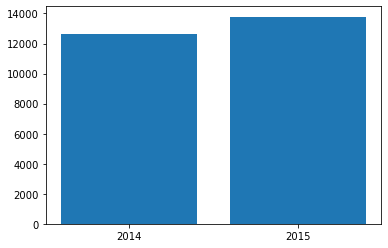

In [92]:
means = saledate.groupby('year')['sellingprice'].mean()
plt.bar(means.index, means.values)

In [93]:
pd.get_dummies(saledate[['year', 'sellingprice']], drop_first = True).corr()

,sellingprice,year_2015
sellingprice,1.00000,0.03253
year_2015,0.03253,1.00000


In [94]:
## To avoid same name of columns appeared in original dataframe
saledate.rename({'year': 'saleyear'}, axis = 1, inplace = True)

In [95]:
df = pd.concat((df, saledate.iloc[:, :-1]), axis = 1)

'state' column

In [96]:
te = TargetEncoder(cols = ['state']).fit(df['state'], df['sellingprice'])
df['encoded_state'] = te.transform(df['state'])

In [97]:
df.shape

(497863, 39)

Now, let's pay attention to 'transmission' column

In [98]:
# number of distinct values in column, before filling
df['transmission'].value_counts()

automatic    424962
manual        15441
Name: transmission, dtype: int64

Now, we will try to fill with two distinct models and look for effectiveness

In [99]:
# first Logistic Regression
from sklearn.linear_model import LogisticRegression

In [100]:
# # select all columns except the one with missing values
# cols = df.columns[df.isna().any()].tolist()
# X_cols = [col for col in df.columns if col not in cols]

In [101]:
newdf = df.copy()

In [102]:
newdf.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O'), dtype('uint8')],
      dtype=object)

In [103]:
X = newdf.select_dtypes([np.int64, np.float64])
y = newdf.transmission

In [104]:
# separate the dataframe into two subsets: one with null values and the other without
conditions = y.isnull()

X_train = X.loc[~conditions]
y_train = y.loc[~conditions]

X_test = X.loc[conditions]

In [105]:
# create a logistic regression model and fit it on the non-missing data
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_pred = lr.predict(X_test)
y.loc[conditions] = y_pred

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [107]:
y.isna().sum()

0

In [108]:
newdf['transmission'] = y

In [109]:
newdf['transmission'].isna().sum()

0

In [110]:
newdf['transmission'].value_counts()

automatic    482422
manual        15441
Name: transmission, dtype: int64

In [111]:
newdf.index

RangeIndex(start=0, stop=497863, step=1)

As we observed above,Logistic Regression filled all nulls with one value,clearly made Overfitting

In [112]:
# filling with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

newdf = df.copy()
X = newdf.select_dtypes([np.int64, np.float64])
y = newdf.transmission

conditions = y.isnull()

X_train = X.loc[~conditions]
y_train = y.loc[~conditions]

X_test = X.loc[conditions]

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [113]:
y.loc[conditions] = y_pred
newdf['transmission'] = y

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [114]:
newdf['transmission'].value_counts()

automatic    479587
manual        18276
Name: transmission, dtype: int64

In [115]:
df['transmission'] = newdf['transmission']

In [116]:
df['transmission'].isna().sum()

0

In [117]:
df['transmission'] = pd.get_dummies(df['transmission'],drop_first = True)

In [119]:
df.columns

Index(['year', 'make', 'model', 'trim', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'encoded_body', 'coupe', 'crew_cab',
       'hatchback', 'sedan', 'suv', 'van', 'wagon', 'eval_color',
       'encoded_color', 'encoded_interior', 'auto', 'corporation', 'credit',
       'inc', 'services', 'day', 'month', 'day_number', 'saleyear', 'time',
       'gmt', 'standard_time', 'encoded_state'],
      dtype='object')

This model filled much better and with statistical precision, for this reason we chose that one.

In [120]:
# actually we can simply delete 'vin' column, because it has lots of distinct values and plays no significant statistical role
del df['vin']

In [121]:
df.head()

,year,make,model,trim,transmission,state,condition,odometer,color,interior,...,inc,services,day,month,day_number,saleyear,time,gmt,standard_time,encoded_state
0,2015,12200.000000,15998.840757,10470.934372,0,ca,5.0,16639.0,white,black,...,1.0,0.0,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST),14476.33984
1,2015,12200.000000,15998.840757,10470.934372,0,ca,5.0,9393.0,white,beige,...,1.0,0.0,Tue,Dec,16,2014,12:30:00,GMT-0800,(PST),14476.33984
2,2014,18999.630515,16349.433138,22635.669880,0,ca,4.5,1331.0,gray,black,...,0.0,1.0,Thu,Jan,15,2015,04:30:00,GMT-0800,(PST),14476.33984
3,2015,9000.921394,15796.632367,16468.415441,0,ca,4.1,14282.0,white,black,...,0.0,0.0,Thu,Jan,29,2015,04:30:00,GMT-0800,(PST),14476.33984
4,2014,18999.630515,54148.314607,34901.343511,0,ca,4.3,2641.0,gray,black,...,0.0,1.0,Thu,Dec,18,2014,12:30:00,GMT-0800,(PST),14476.33984


In [122]:
corrs = df.corr()['sellingprice']

In [123]:
selected_cols = corrs.index[np.abs(corrs.values) > 0.2]

In [124]:
dfmod = df[selected_cols]

In [125]:
dfmod.head()

,year,make,model,trim,condition,odometer,mmr,sellingprice,encoded_interior,encoded_state
0,2015,12200.000000,15998.840757,10470.934372,5.0,16639.0,20500,21500,15638.865681,14476.33984
1,2015,12200.000000,15998.840757,10470.934372,5.0,9393.0,20800,21500,13331.673347,14476.33984
2,2014,18999.630515,16349.433138,22635.669880,4.5,1331.0,31900,30000,15638.865681,14476.33984
3,2015,9000.921394,15796.632367,16468.415441,4.1,14282.0,27500,27750,15638.865681,14476.33984
4,2014,18999.630515,54148.314607,34901.343511,4.3,2641.0,66000,67000,15638.865681,14476.33984


Our target column is 'sellingprice' and we want to predict its values by building Regression model.Actually,after skeeming correlation matrix, we can conclude that columns have good correlations with 'sellingprice', so our model probably will be successful.

Visualization part

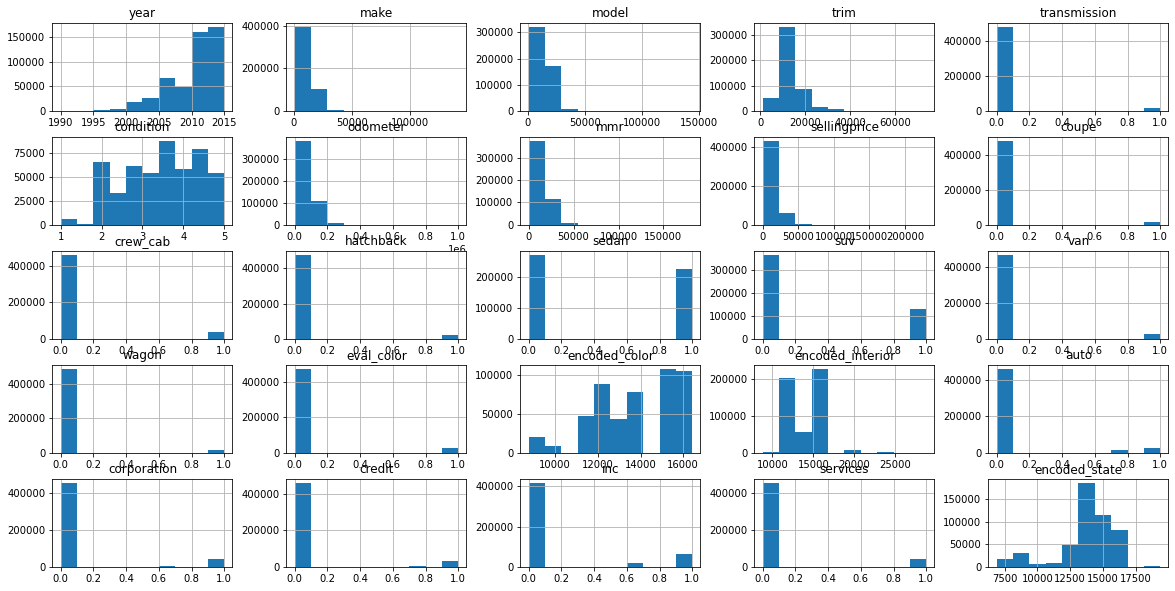

In [126]:
# now we will look at distributions of columns
import matplotlib.pyplot as plt
# create histograms of all columns in the dataframe
df.hist(bins=10, figsize=(20,10))
plt.show()

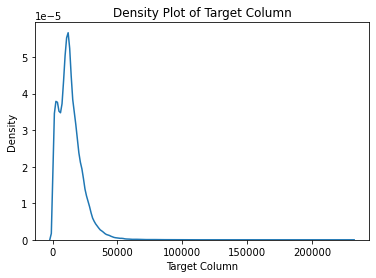

In [127]:
import seaborn as sns
# Plot a density plot of the target column
sns.kdeplot(df["sellingprice"])
plt.xlabel("Target Column")
plt.ylabel("Density")
plt.title("Density Plot of Target Column")
plt.show()

Modelling part

In [129]:
# mmr column must be excluded,due to high correlation(98%)
X = dfmod.drop(columns = ['sellingprice','mmr'], axis = 1)
y = dfmod['sellingprice']

Now, we are going to model and see results,if possible we will make  adjustments too.

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [131]:
# first Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.750369807205703

In [132]:
reg.score(X_train, y_train)

0.752120957838984

In [133]:
reg.coef_

array([ 4.15919623e+02,  1.06684526e-01,  5.45413919e-01,  4.68595108e-01,
        1.60515811e+03, -3.73184238e-02,  9.49942554e-02,  1.17187239e-01])

In [134]:
reg.intercept_

-843630.5898844197

In [135]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor

In [136]:
param_grid = {'max_depth' : [2,3,5,10],
             'min_samples_split':[500,1000,2000,10000]}

In [137]:
gscv = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1
) 


In [138]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_split': [500, 1000, 2000, 10000]})

In [139]:
gscv.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [140]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [141]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 10, min_samples_split = 500)

In [142]:
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=500)

In [143]:
regr.score(X_test,y_test)

0.8653878079822956

In [144]:
regr.score(X_train,y_train)

0.8649473854959816